# Week4 (Regression) 과제
## Boston Housing Data 분석
### 데이터 소개
- **CRIM**: Per capita crime rate by town.
- **ZN**: Proportion of residential land zoned for lots over 25,000 square feet.
- **INDUS**: Proportion of non-retail business acres per town.
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- **NOX**: Nitric oxide concentration (parts per 10 million).
- **RM**: Average number of rooms per dwelling.
- **AGE**: Proportion of owner-occupied units built prior to 1940.
- **DIS**: Weighted distances to five Boston employment centers.
- **RAD**: Index of accessibility to radial highways.
- **TAX**: Full-value property tax rate per $10,000.
- **PTRATIO**: Pupil-teacher ratio by town.
- **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town.
- **LSTAT**: Percentage of lower status of the population.

Target Variable:
- **MEDV**: Median value of owner-occupied homes in $1000s.

In [2]:
# 코랩 환경: 구글 드라이브를 코랩에 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
# housing.xls가 포함된 경로를 저장해봅시다.
PATH = '/content/drive/MyDrive/'

In [7]:
# 본인 구글 드라이브에 업로드한 housing.xls 파일의 주소를 넣어주세요!
house = pd.read_excel(PATH+'housing.xls')

# Q1: `head`, `info`, `describe`, `shape` 함수를 실행해봅시다.

과제2 참고

In [8]:
# .head()
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [10]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
house.shape

(506, 14)

# Q2: 각 변수의 결측치 (NaN 또는 Null)의 개수를 구해봅시다.

과제2 참고

In [13]:
# NaN의 개수 구하기
house.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


# Q3: 각 변수별로 히스토그램을 그리고, Scatterplot Matrix를 그려봅시다

과제2 참고

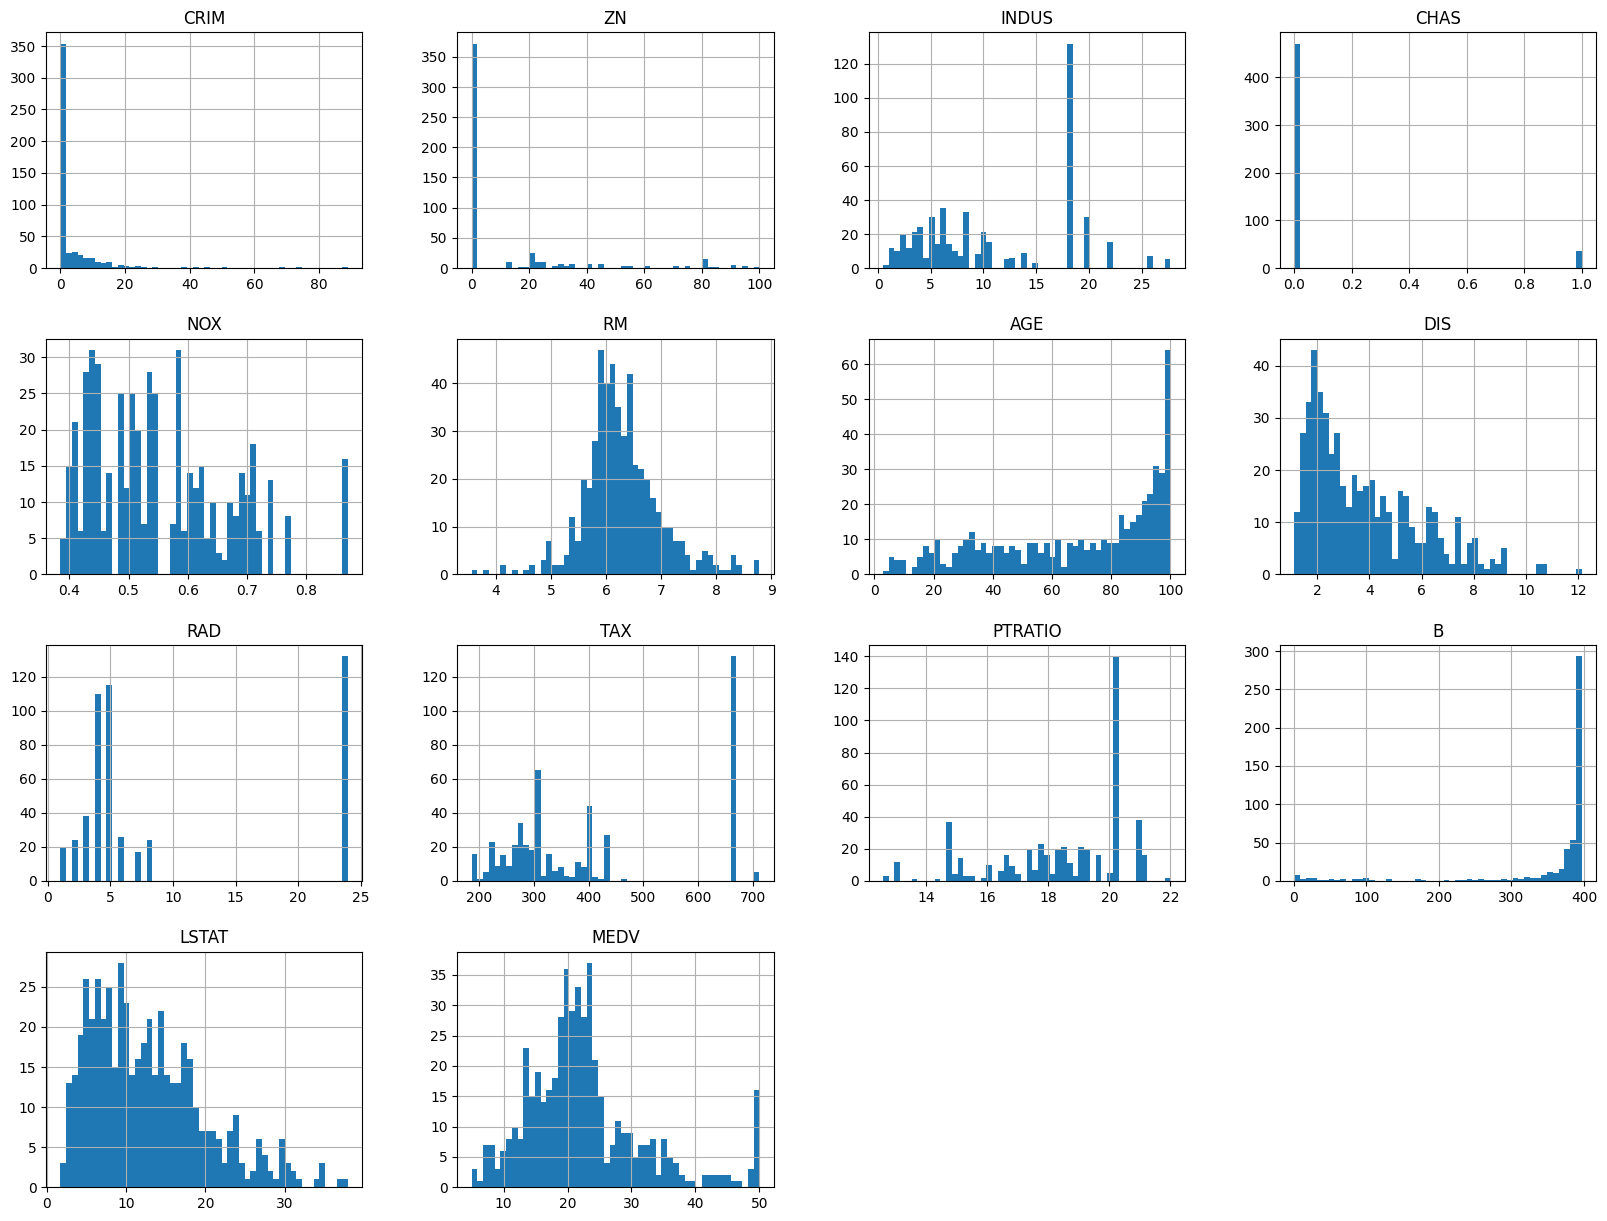

In [14]:
# Histogram
house.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
# Scatterplot Matrix
sns.pairplot(house)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Q3-1. 다중공선성(multicolinearity)을 확인하기 위해 VIF를 추가로 확인해봅시다.

In [16]:
# 그대로 실행하기 !!
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(house.values, i) for i in range(house.shape[1])]
vif['features'] = house.columns
vif

,VIF Factor,features
0,2.131404,CRIM
1,2.910004,ZN
2,14.485874,INDUS
3,1.176266,CHAS
4,74.004269,NOX
5,136.101743,RM
6,21.398863,AGE
7,15.430455,DIS
8,15.369980,RAD
9,61.939713,TAX


## Q3-2.
VIF가 높은 변수가 하나씩 줄어들면 다른 변수들의 VIF에도 영향을 미치기 때문에 변수들을 한 번에 다 제거하기보다는 하나씩 제거하면서 확인해 나아가는 것이 바람직합니다! 여러 차례 VIF를 확인해보면서 변수를 제거해보세요!

In [24]:
vif = pd.DataFrame()
x_data = house.drop( 'RM' ,axis=1) # VIF 높은 변수 기입
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif

,VIF Factor,features
0,2.110287,CRIM
1,2.889159,ZN
2,14.202832,INDUS
3,1.174535,CHAS
4,62.073615,NOX
5,20.752654,AGE
6,14.258330,DIS
7,15.134503,RAD
8,61.603579,TAX
9,69.068505,PTRATIO


In [25]:
x_data = x_data.drop('PTRATIO', axis=1)
vif = pd.DataFrame()
vif["features"] = x_data.columns
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif

,features,VIF Factor
0,CRIM,2.104099
1,ZN,2.558330
2,INDUS,14.147928
3,CHAS,1.162582
4,NOX,59.247225
5,AGE,20.427509
6,DIS,9.639018
7,RAD,15.130157
8,TAX,58.759509
9,B,19.222365


In [26]:
x_data = x_data.drop('NOX', axis=1)
vif = pd.DataFrame()
vif["features"] = x_data.columns
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif

,features,VIF Factor
0,CRIM,2.103346
1,ZN,2.548017
2,INDUS,13.152242
3,CHAS,1.161474
4,AGE,17.056895
5,DIS,9.446150
6,RAD,15.049247
7,TAX,54.753156
8,B,18.593595
9,LSTAT,11.031436


In [27]:
x_data = x_data.drop('TAX', axis=1)
vif = pd.DataFrame()
vif["features"] = x_data.columns
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif

,features,VIF Factor
0,CRIM,2.103261
1,ZN,2.465535
2,INDUS,9.024818
3,CHAS,1.142745
4,AGE,16.449470
5,DIS,8.722321
6,RAD,4.858231
7,B,18.131319
8,LSTAT,10.934458
9,MEDV,11.385287


**house 데이터셋에 변수 제거를 적용하지 않고 우선 진행하세요! 추후에 MSE 비교를 통해 변수 제거를 확실히 해봅시다.**

# Q4: 데이터를 `X_train`, `X_test`, `y_train`, `y_test` 로 split해 봅시다

split 비율은 자유롭게 정해보시기 바랍니다.

In [28]:
# train_test_split
data = house.columns[:-1]
X = house[data]
y = house['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Q5: `StandardScaler`로 표준화를 해봅시다

CRIM, ZN, INDUS, NOX, RM, AGE, DIS, TAX, PTRATIO, B, LSTAT 변수들만 `StandardScaler`을 해봅시다. (이들 중 다중공선성으로 인해 제거한 변수들이 있다면 제외하고 진행해주세요.)

`X_train`은 `fit_transform`, `X_test`는 `transform`을 이용하는 것에 유의합시다!

In [29]:
# StandardScaler
scale_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
scaler = StandardScaler()
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

# Q6: 5-fold Cross-Validation으로 `LinearRegression`을 적합해봅시다.

각 fold마다 적합 후 MSE, MAE, RMSE, $R^2$를 구하고, coefficient과 intercept를 `print` 해보세요.

In [30]:
# KFold, cross_val_score, cross_validation 이용
from ast import mod
# KFold, cross_val_score, cross_validation 이용
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
kfold = KFold(n_splits=5)
MSE = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kfold)
MAE = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=kfold)
RMSE = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=kfold)
R2 = cross_val_score(model, X_train, y_train, scoring='r2', cv=kfold)

print('fold당 MSE', MSE)
print('fold당 MAE', MAE)
print('fold당 RMSE', RMSE)
print('fold당 R2', R2)

print('평균 MSE:', MSE.mean())
print('평균 MAE:', MAE.mean())
print('평균 RMSE:', RMSE.mean())
print('평균 R2:', R2.mean())
coef = model.coef_
intercept = model.intercept_
print('coefficient:', coef)
print('intercept:', intercept)

fold당 MSE [-17.20183677 -34.40858715 -23.73328987 -20.28446607 -22.6439115 ]
fold당 MAE [-3.21371112 -3.90566396 -3.52780058 -3.42949573 -3.1688474 ]
fold당 RMSE [-4.14750971 -5.86588332 -4.87168245 -4.50382793 -4.75856192]
fold당 R2 [0.77501982 0.62424945 0.7594282  0.78766681 0.67581438]
평균 MSE: -23.65441827030466
평균 MAE: -3.4491037562505324
평균 RMSE: -4.829493065236916
평균 R2: 0.7244357342240262
coefficient: [-1.00213533  0.69626862  0.27806485  2.7844382  -2.0223194   3.14523956
 -0.17604788 -3.0819076   0.26242974 -1.76701378 -2.03775151  1.12956831
 -3.61165842]
intercept: 20.141254682145096


### Q6-1: 다중공선성이 높았던 변수를 제거한 후 다시 train_test_split, scaler, 5-fold CV 과정으로 `LinearRegression`을 적합한 후 Q6에서 구한 평균 MSE(or MAE, RMSE, $R^2$)와 비교해보세요.

In [31]:
# 다중공선성을 불러일으키는 변수 제거
house_new = house.drop(['NOX', 'RM', 'TAX','PTRATIO'], axis=1) # VIF 높은 변수들 기입

In [32]:
# train_test_split
X = house_new.drop('MEDV', axis=1)
y = house_new['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# StandardScaler
scale_cols = ['CRIM', 'ZN', 'INDUS', 'AGE', 'DIS', 'B', 'LSTAT']
scaler = StandardScaler()
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

# KFold, cross_val_score, cross_validation 이용
model.fit(X_train, y_train)
kfold = KFold(n_splits=5)
MSE = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kfold)
MAE = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=kfold)
RMSE = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=kfold)
R2 = cross_val_score(model, X_train, y_train, scoring='r2', cv=kfold)

print('평균 MSE:', MSE.mean())
print('평균 MAE:', MAE.mean())
print('평균 RMSE:', RMSE.mean())
print('평균 R2:', R2.mean())
coef = model.coef_
intercept = model.intercept_
print('coefficient:', coef)
print('intercept:', intercept)

평균 MSE: -33.26104919272787
평균 MAE: -4.2575841890915775
평균 RMSE: -5.762779232132038
평균 R2: 0.6066508751552433
coefficient: [-1.01824632  1.79767787 -1.90042194  4.00416334  0.2362207  -3.72345342
  0.01667052  0.82074042 -6.27571739]
intercept: 22.353130429016076


# Q7(Optional): `GridSearchCV`를 이용하여 `Lasso`를 적합해봅시다.

찾아야 하는 최적 파라미터는

- `alpha`: 0.01, 0.1, 1, 10 중에서 찾기
- `fit_intercept`: `True`, `False`에서 찾기

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

위 링크를 참조하여 `GridSearCV`의 `scoring`을 3가지 이상 사용해보세요

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error

# param_grid
alpha = [0.01, 0.1, 1, 10]
fit_intercept = [True, False]
param_grid = {'alpha': alpha, 'fit_intercept': fit_intercept}

scoring = {'neg_mse' : 'neg_mean_squared_error', 'neg_mae' : 'neg_mean_absolute_error','r2': 'r2'}
lasso = Lasso(max_iter=10000)
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring=scoring, refit = 'r2', return_train_score=True)
grid_search.fit(X_train, y_train)
print('best parameter:', grid_search.best_params_)
print('best R2 score:', grid_search.best_score_)

results = pd.DataFrame(grid_search.cv_results_)
display(results[['params', 'mean_test_r2', 'mean_test_neg_mse', 'mean_test_neg_mae']])

best parameter: {'alpha': 0.01, 'fit_intercept': True}
best R2 score: 0.60698090145453


,params,mean_test_r2,mean_test_neg_mse,mean_test_neg_mae
0,"{'alpha': 0.01, 'fit_intercept': True}",0.606981,-33.235645,-4.254135
1,"{'alpha': 0.01, 'fit_intercept': False}",-1.153228,-184.772631,-10.464231
2,"{'alpha': 0.1, 'fit_intercept': True}",0.606208,-33.326688,-4.236389
3,"{'alpha': 0.1, 'fit_intercept': False}",-1.148096,-184.340733,-10.493568
4,"{'alpha': 1, 'fit_intercept': True}",0.512888,-41.432186,-4.643382
5,"{'alpha': 1, 'fit_intercept': False}",-1.215646,-190.191619,-11.145205
6,"{'alpha': 10, 'fit_intercept': True}",0.120806,-75.821212,-6.416684
7,"{'alpha': 10, 'fit_intercept': False}",-3.315170,-370.991189,-17.442832


# Q8(Optional): `RandomizedSearchCV`를 이용하여 `Ridge`를 적합해 봅시다.

CV를 이용한 hyperparameter tuning의 또다른 방법은 `RandomizedSearchCV`입니다.
Tuning해야 하는 모수가 많을 경우 이 방법이 빠르다는 장점이 있습니다.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#

위 링크를 참조하거나 구글링을 하여 `Ridge`를 적합해보세요.

`n_iter`와, 파라미터 공간을 자유롭게 조정해보세요.

In [34]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

ridge = Ridge()
hyperParameters = {'alpha':loguniform(1e-3, 1e3)}
ridgeRegressor = RandomizedSearchCV(ridge, hyperParameters  ,n_iter=10, scoring='neg_mean_squared_error', cv=5)
ridgeRegressor.fit(X,y)

print("Best value for lambda : ",ridgeRegressor.best_params_)
print("Best score for cost function: ", ridgeRegressor.best_score_)

results = pd.DataFrame(ridgeRegressor.cv_results_)
display(results[['params', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score'))

Best value for lambda :  {'alpha': np.float64(1.3013772808670312)}
Best score for cost function:  -36.144467349447034


,params,mean_test_score,rank_test_score
0,{'alpha': 1.3013772808670312},-36.144467,1
5,{'alpha': 0.19224607005307034},-36.183898,2
8,{'alpha': 0.1833675874573404},-36.184315,3
9,{'alpha': 0.17514628131161658},-36.184702,4
1,{'alpha': 0.0020790114456102856},-36.193231,5
3,{'alpha': 0.0017925373068408935},-36.193245,6
4,{'alpha': 13.64584875438716},-36.262243,7
7,{'alpha': 63.48308736144402},-36.901058,8
6,{'alpha': 254.15173830394826},-37.834322,9
2,{'alpha': 704.8438137284426},-39.126881,10
